[Home](../README.md)

### Model Training - Linear Regression

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. We will now Train a Linear regression algorithm on the features you have engineered to see how closely we can predict the health outcomes for individuals.


#### Step 1

Load the required dependencies:

In [14]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle
data_frame = pd.read_csv("training_data.csv")

#### Step 2

Store the data columns for Linear Regression.

In [15]:
# Create a data frame from the csv file
training_data = pd.read_csv('training_data.csv')

x_name = 'budget'
y_name = 'gross'
x = np.array(training_data[x_name]).reshape(-1, 1)
y = np.array(training_data[y_name])

#### Step 3

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

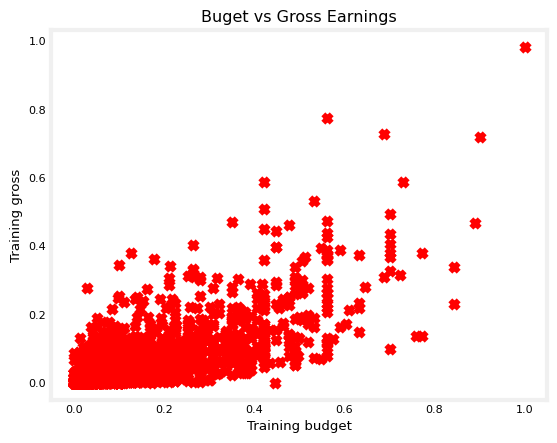

In [ ]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Budget vs Gross Earnings")
# Set the y-axis label
plt.ylabel(f'Training {training_data[y_name].name}')
# Set the x-axis label
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

#### Step 4

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [4]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

#### Step 5

Plot the features, targets and model (linear regression).

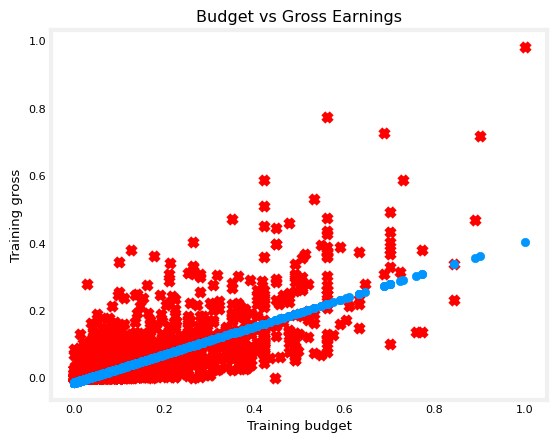

In [ ]:
y_pred = my_model.predict(x)
plt.scatter(x, y, marker='x', c='r')
plt.scatter(x, y_pred)
plt.title("Budget vs Gross Earnings")
plt.ylabel(f'Training {training_data[y_name].name}')
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

In [ ]:
# save the model to disk
filename = 'my_saved_model_v1.sav'
pickle.dump(my_model, open('../Model_Testing_and_Validation/' + filename, 'wb'))

#### Step 6. Evaluate the correlation of each feature
Students should perform single feature linear regression on each feature and evaluate the score of the model to get a feel for which features correlate with the target.

#### Step 7. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [ ]:
# Create a data frame from the csv file
training_data = pd.read_csv('training_data.csv')

x_name = ['budget','score','release_quarter', 'star_popularity', 'director_popularity', 'votes']
y_name = 'gross'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

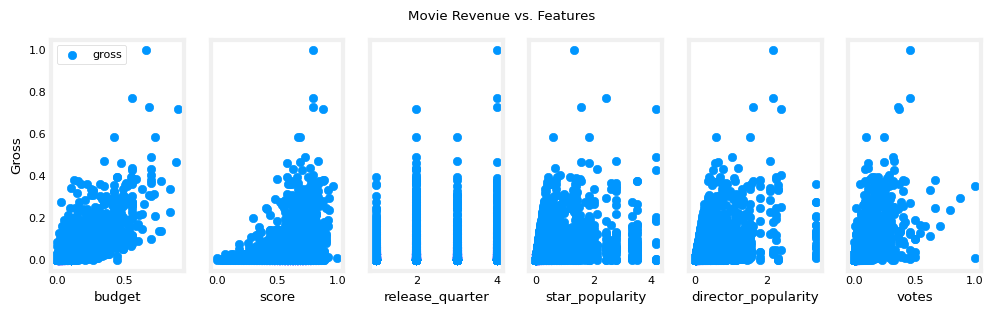

In [17]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'gross')
    ax[i].set_xlabel(x_name[i])
ax[0].set_ylabel("Gross"); ax[0].legend();
fig.suptitle("Movie Revenue vs. Features")
plt.show()

In [18]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

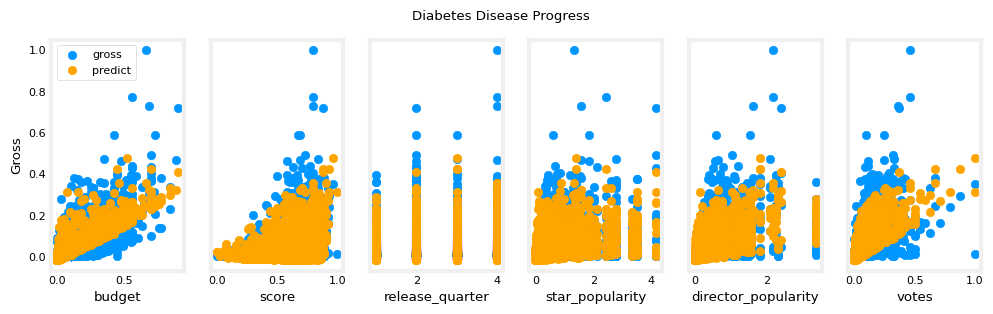

In [ ]:
# scatter plot predictions and targets vs original features    
y_pred = my_model.predict(x)
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'gross')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Gross"); ax[0].legend();
fig.suptitle("Movie Revenue vs. Features")
plt.show()

In [21]:
# save the model to disk
filename = 'my_saved_model_v2.sav'
pickle.dump(my_model, open('../Model_Testing_and_Validation/' + filename, 'wb'))

#### Step 8. Explore differnet features

Students should now use their acquired knowledge from step 6 to test and evaluate different feature combinations to produce a model with the best possible intuition.